<a href="https://colab.research.google.com/github/Ketchupncurd/Crop_Yield_Predict/blob/main/crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from lightgbm import LGBMRegressor


In [28]:
#LOAD DATASET
df = pd.read_csv('Maharashtra_Oilseed_ML_Dataset.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()


Dataset loaded successfully!
Shape: (1920, 22)


,Year,Season,District,Crop,Area_Hectares,Production_Tonnes,Yield_KgPerHa,Rainfall_mm,Min_Temperature_C,Max_Temperature_C,...,Organic_Carbon_Percent,Nitrogen_KgPerHa,Phosphorus_KgPerHa,Potassium_KgPerHa,Soil_Type,Irrigation_Type,Pest_Incidence_Score,Urea_Applied_KgPerHa,DAP_Applied_KgPerHa,Potash_Applied_KgPerHa
0,2015,Kharif,Ahmednagar,Soybean,1577,2117,1343,514.29,23.25,30.45,...,0.30,348.44,28.52,217.86,Black Soil,Rainfed,2,111.19,39.76,37.53
1,2015,Kharif,Akola,Soybean,1966,2966,1509,944.25,22.25,30.11,...,0.65,153.19,16.93,158.56,Red Soil,Irrigated,2,140.93,48.11,59.75
2,2015,Kharif,Amravati,Soybean,4383,6329,1444,1115.86,22.99,37.37,...,0.34,215.07,21.66,163.42,Laterite Soil,Rainfed,3,110.70,49.32,37.78
3,2015,Kharif,Beed,Soybean,5091,7030,1381,884.77,24.63,35.21,...,0.70,169.08,21.12,227.01,Red Soil,Rainfed,5,138.72,63.06,27.18
4,2015,Kharif,Bhandara,Soybean,3426,4008,1170,561.38,24.48,33.80,...,0.43,270.88,26.20,152.49,Alluvial Soil,Rainfed,2,66.12,95.08,68.49


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    1920 non-null   int64  
 1   Season                  1920 non-null   object 
 2   District                1920 non-null   object 
 3   Crop                    1920 non-null   object 
 4   Area_Hectares           1920 non-null   int64  
 5   Production_Tonnes       1920 non-null   int64  
 6   Yield_KgPerHa           1920 non-null   int64  
 7   Rainfall_mm             1920 non-null   float64
 8   Min_Temperature_C       1920 non-null   float64
 9   Max_Temperature_C       1920 non-null   float64
 10  Humidity_Percent        1920 non-null   float64
 11  Soil_pH                 1920 non-null   float64
 12  Organic_Carbon_Percent  1920 non-null   float64
 13  Nitrogen_KgPerHa        1920 non-null   float64
 14  Phosphorus_KgPerHa      1920 non-null   

In [30]:
df.describe()

,Year,Area_Hectares,Production_Tonnes,Yield_KgPerHa,Rainfall_mm,Min_Temperature_C,Max_Temperature_C,Humidity_Percent,Soil_pH,Organic_Carbon_Percent,Nitrogen_KgPerHa,Phosphorus_KgPerHa,Potassium_KgPerHa,Pest_Incidence_Score,Urea_Applied_KgPerHa,DAP_Applied_KgPerHa,Potash_Applied_KgPerHa
count,1920.00000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.00000,1920.000000,1920.000000
mean,2019.50000,1600.772396,2133.546875,1161.055208,481.822828,18.193969,31.325365,63.983016,6.993375,0.748641,252.762047,24.768901,199.475719,2.477604,99.74250,65.176083,50.107240
std,2.87303,1117.868181,1917.313959,529.684544,352.374323,4.677167,3.544208,11.623907,0.577555,0.262390,57.502220,8.574294,46.559981,1.703847,29.10541,20.163086,17.136686
min,2015.00000,94.000000,30.000000,272.000000,50.230000,10.000000,25.010000,40.010000,6.000000,0.300000,150.000000,10.030000,120.010000,0.000000,50.03000,30.010000,20.080000
25%,2017.00000,746.000000,561.750000,717.000000,172.280000,13.845000,28.537500,55.887500,6.510000,0.520000,203.482500,17.330000,158.732500,1.000000,74.04250,48.005000,35.547500
50%,2019.50000,1361.000000,1525.000000,1094.000000,350.410000,19.005000,31.140000,64.585000,6.980000,0.750000,253.270000,24.640000,199.770000,2.000000,100.15000,65.305000,49.895000
75%,2022.00000,2157.250000,3202.250000,1565.500000,776.355000,22.470000,34.117500,72.492500,7.490000,0.970000,302.940000,32.105000,240.052500,4.000000,123.95000,82.672500,65.102500
max,2024.00000,6199.000000,10676.000000,2608.000000,1199.170000,24.990000,38.000000,84.990000,8.000000,1.200000,349.980000,39.970000,279.920000,5.000000,149.97000,99.980000,79.990000


In [31]:
categorical_features = ['Crop', 'Season', 'District', 'Soil_Type', 'Irrigation_Type']

for col in categorical_features:
    grouped_data = df[[col, 'Yield_KgPerHa']].groupby(col).mean()
    print(f"Mean Yield_KgPerHa by {col}:")
    display(grouped_data)
    print()

Mean Yield_KgPerHa by Crop:


,Yield_KgPerHa
Crop,
Groundnut,1754.950000
Safflower,766.540625
Sesame,484.100000
Soybean,1238.100000
Sunflower,967.690625



Mean Yield_KgPerHa by Season:


,Yield_KgPerHa
Season,
Kharif,1157.227083
Rabi,1164.883333



Mean Yield_KgPerHa by District:


,Yield_KgPerHa
District,
Ahmednagar,1187.866667
Akola,1220.483333
Amravati,1212.166667
Beed,1178.966667
Bhandara,1174.700000
Buldhana,1167.100000
Chandrapur,1117.183333
Dhule,1147.183333
Gadchiroli,1118.650000



Mean Yield_KgPerHa by Soil_Type:


,Yield_KgPerHa
Soil_Type,
Alluvial Soil,1191.634921
Black Soil,1164.389848
Laterite Soil,1160.206642
Red Soil,1142.456842



Mean Yield_KgPerHa by Irrigation_Type:


,Yield_KgPerHa
Irrigation_Type,
Drip,1139.744681
Irrigated,1182.342246
Rainfed,1161.402766
Sprinkler,1139.378109


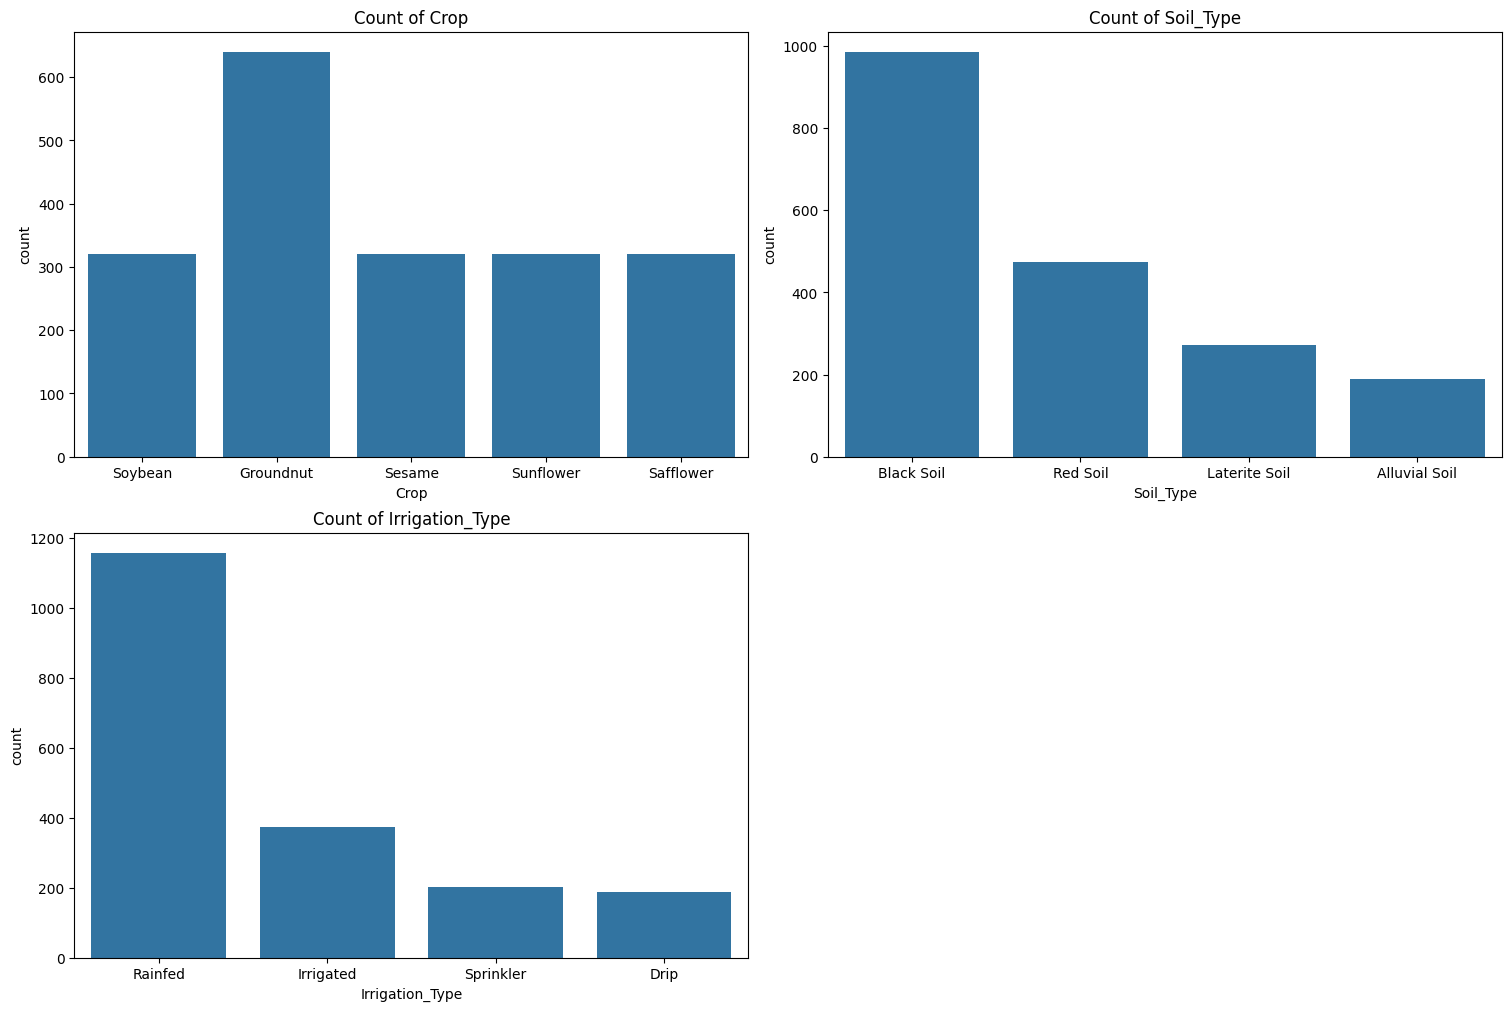

In [32]:
categorical_features = ['Crop', 'Soil_Type', 'Irrigation_Type'] # Removed 'Season' and 'District'

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # Adjusted subplot grid size
fig.set_constrained_layout(True) # Use constrained_layout
axes = axes.flatten() # Flatten axes for easy iteration

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, ax=axes[i]) # Pass the axis to seaborn
    axes[i].set_title(f'Count of {col}') # Add titles to subplots

# Remove any unused axes
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.show()

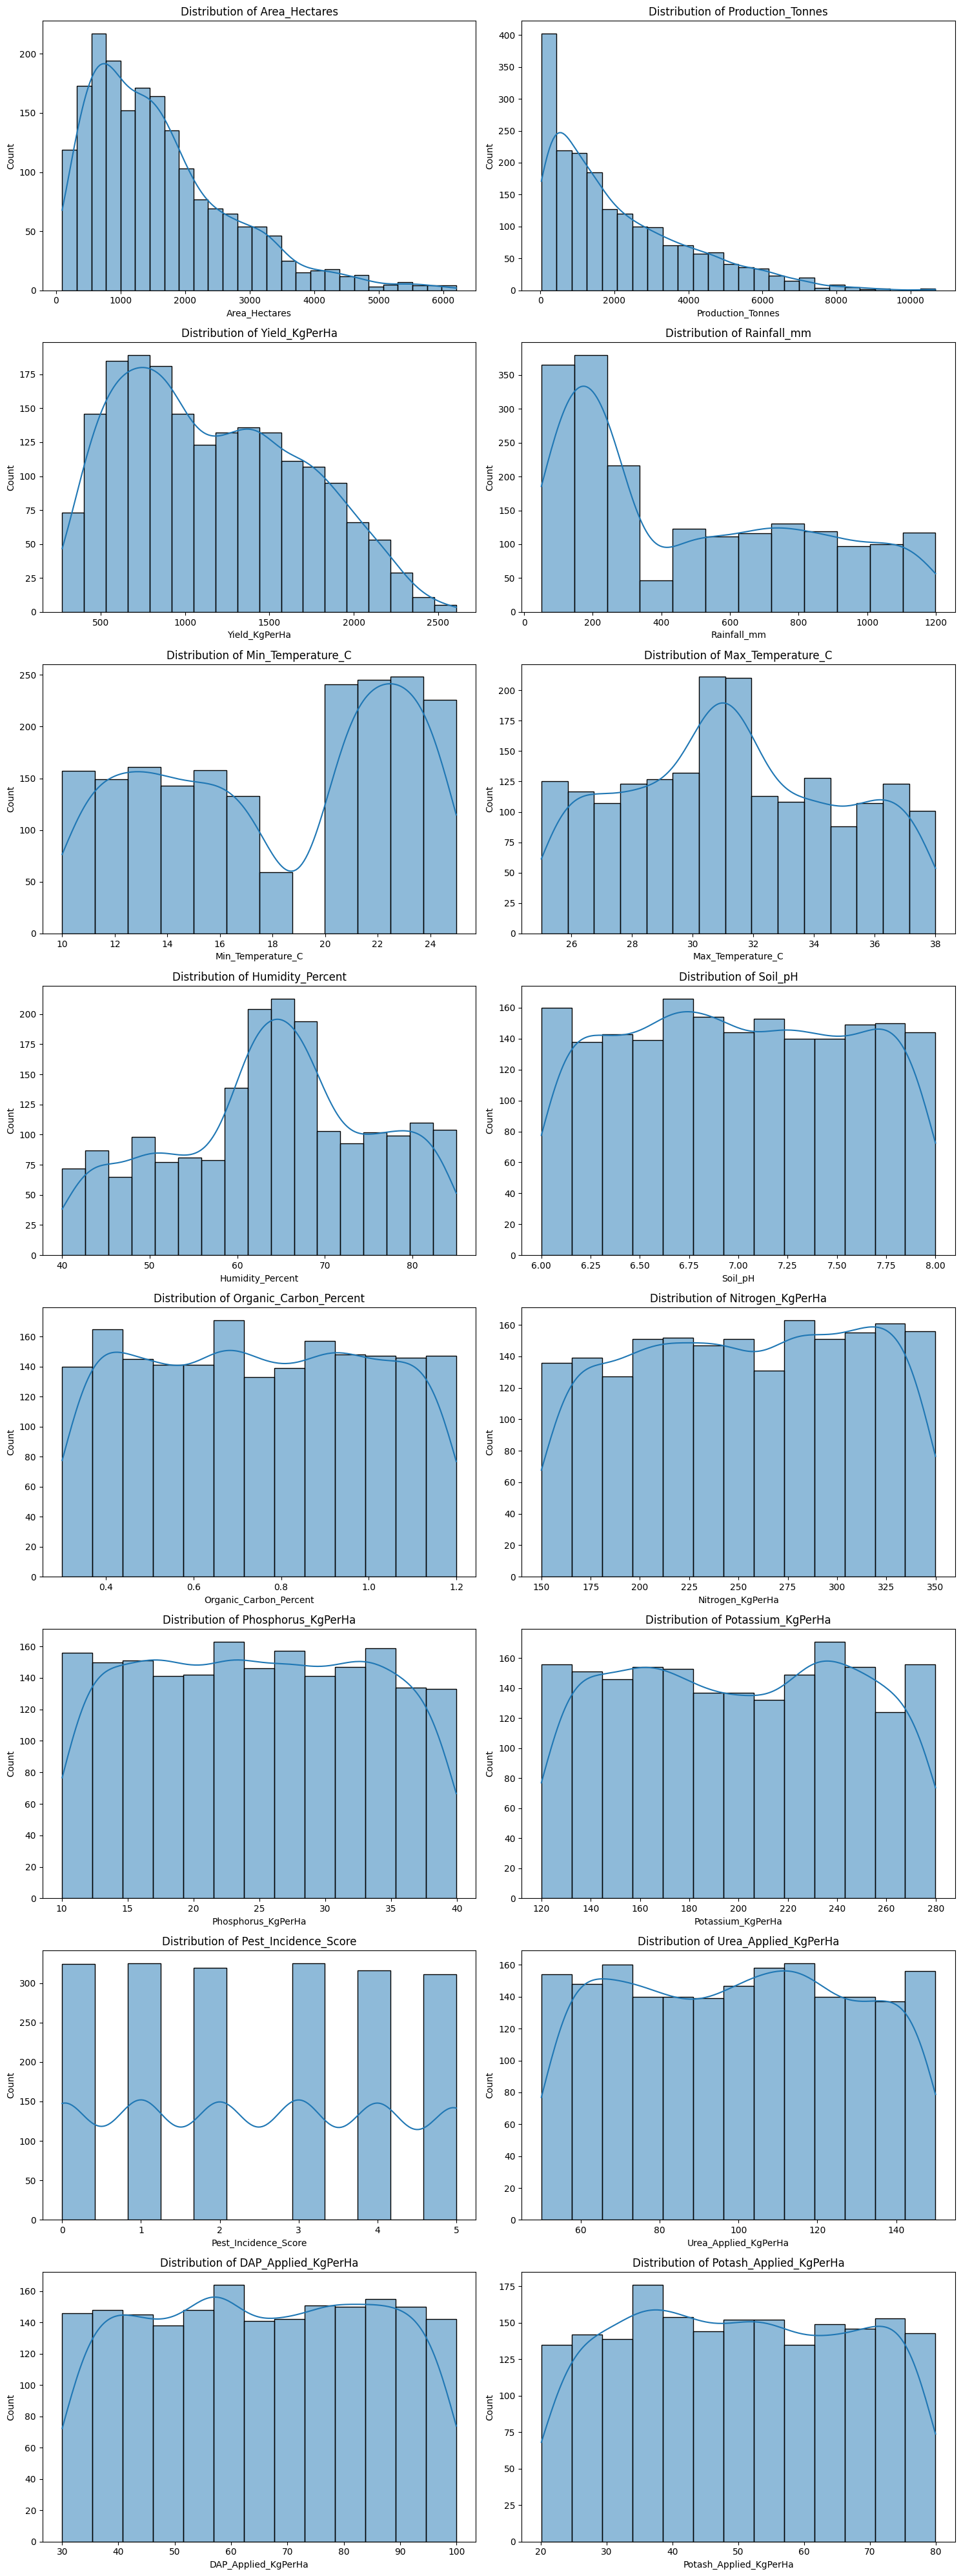

In [33]:
numeric_cols = ['Area_Hectares', 'Production_Tonnes', 'Yield_KgPerHa', 'Rainfall_mm',
                'Min_Temperature_C', 'Max_Temperature_C', 'Humidity_Percent', 'Soil_pH',
                'Organic_Carbon_Percent', 'Nitrogen_KgPerHa', 'Phosphorus_KgPerHa',
                'Potassium_KgPerHa', 'Pest_Incidence_Score', 'Urea_Applied_KgPerHa',
                'DAP_Applied_KgPerHa', 'Potash_Applied_KgPerHa']

n_cols = len(numeric_cols)
n_rows = (n_cols + 1) // 2 # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
axes = axes.flatten() # Flatten axes for easy iteration

for i, col in enumerate(numeric_cols):
    if i < len(axes): # Ensure we don't try to plot on a non-existent axis
        sns.histplot(data=df, x=col, kde=True, ax=axes[i]) # Pass the axis to seaborn
        axes[i].set_title(f'Distribution of {col}') # Add titles to subplots

# Remove any unused axes
for j in range(n_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [34]:
#FEATURE ENGINEERING

df_processed = df.copy()

df_processed['Temp_Range'] = df_processed['Max_Temperature_C'] - df_processed['Min_Temperature_C']
df_processed['NPK_Total'] = (df_processed['Nitrogen_KgPerHa'] +
                              df_processed['Phosphorus_KgPerHa'] +
                              df_processed['Potassium_KgPerHa'])
df_processed['Fertilizer_Total'] = (df_processed['Urea_Applied_KgPerHa'] +
                                     df_processed['DAP_Applied_KgPerHa'] +
                                     df_processed['Potash_Applied_KgPerHa'])

categorical_features = ['Crop', 'Season', 'District', 'Soil_Type', 'Irrigation_Type']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_processed[col + '_Encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le


In [35]:
#PREPARE DATA

feature_cols = [
    'Year', 'Crop_Encoded', 'Season_Encoded', 'District_Encoded',
    'Area_Hectares', 'Rainfall_mm', 'Min_Temperature_C', 'Max_Temperature_C',
    'Humidity_Percent', 'Soil_pH', 'Organic_Carbon_Percent',
    'Nitrogen_KgPerHa', 'Phosphorus_KgPerHa', 'Potassium_KgPerHa',
    'Soil_Type_Encoded', 'Irrigation_Type_Encoded', 'Pest_Incidence_Score',
    'Urea_Applied_KgPerHa', 'DAP_Applied_KgPerHa', 'Potash_Applied_KgPerHa',
    'Temp_Range', 'NPK_Total', 'Fertilizer_Total'
]

X = df_processed[feature_cols]
y = df_processed['Yield_KgPerHa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1536, 23)
Test set size: (384, 23)


In [36]:
# MODEL TRAINING - LIGHTGBM

import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor, early_stopping, log_evaluation


# Initialize model
lgbm_model = LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.02,
    max_depth=8,
    num_leaves=25,
    subsample=0.9,
    colsample_bytree=0.9,
    min_child_samples=30,
    reg_alpha=0.3,
    reg_lambda=0.4,
    random_state=42,
    verbose=-1,
    force_col_wise=True
)

# Train model
lgbm_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)],
    eval_metric='rmse',
    callbacks=[
        early_stopping(stopping_rounds=100, verbose=False),
        log_evaluation(period=0)
    ]
)

# Predict using DataFrames
y_pred_train = lgbm_model.predict(pd.DataFrame(X_train_scaled, columns=feature_cols))
y_pred_test = lgbm_model.predict(pd.DataFrame(X_test_scaled, columns=feature_cols))

# Evaluate
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"\nTraining R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.2f} kg/ha")
print(f"Testing RMSE: {test_rmse:.2f} kg/ha")
print(f"Training MAE: {train_mae:.2f} kg/ha")
print(f"Testing MAE: {test_mae:.2f} kg/ha")



Training R²: 0.9138
Testing R²: 0.8190
Training RMSE: 155.84 kg/ha
Testing RMSE: 222.98 kg/ha
Training MAE: 125.68 kg/ha
Testing MAE: 175.39 kg/ha


In [37]:
# Create a DataFrame for the evaluation metrics
metrics_data = {
    'Metric': ['R²', 'RMSE (kg/ha)', 'MAE (kg/ha)'],
    'Training': [train_r2, train_rmse, train_mae],
    'Testing': [test_r2, test_rmse, test_mae]
}
metrics_df = pd.DataFrame(metrics_data)

# Melt the DataFrame for plotting
metrics_melted = metrics_df.melt(id_vars='Metric', var_name='Set', value_name='Score')



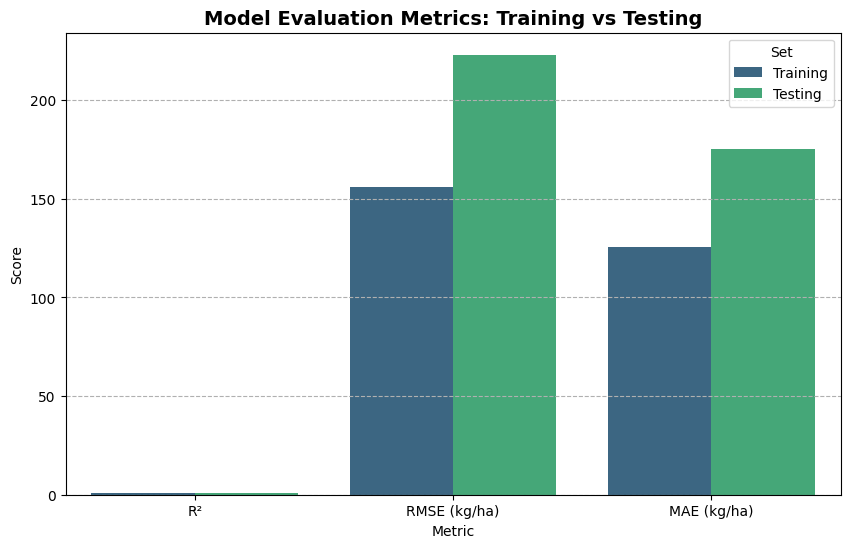

In [38]:
# Plot the metrics
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Set', palette='viridis')
plt.title('Model Evaluation Metrics: Training vs Testing', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# CROSS-VALIDATION
cv_scores = cross_val_score(lgbm_model, X, y, cv=5, scoring='r2')
print("\nCross-Validation R² Scores:", cv_scores)
print(f"Average CV R²: {cv_scores.mean():.4f}")

In [ ]:
# FEATURE IMPORTANCE
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': lgbm_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Most Important Features - LightGBM', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
#PERFORMANCE VISUALS
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.title('Actual vs Predicted Yield (LightGBM)')
plt.grid(True)
plt.show()



In [ ]:
#residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Yield (kg/ha)')
plt.ylabel('Residuals')
plt.title('Residual Plot - LightGBM')
plt.grid(True)
plt.show()

In [ ]:
# Save artifacts (run after model is trained)
import joblib
import os

os.makedirs("models", exist_ok=True)
joblib.dump(lgbm_model, "models/lgbm_model.joblib")

# If you used LabelEncoder objects in a dict called label_encoders:
joblib.dump(label_encoders, "models/label_encoders.joblib")

# Save the FEATURES list used in training (must be exact)
joblib.dump(feature_cols, "models/features_list.joblib")

print("Saved: models/lgbm_model.joblib, models/label_encoders.joblib, models/features_list.joblib")

In [ ]:
from google.colab import files
files.download("models/lgbm_model.joblib")
files.download("models/label_encoders.joblib")
files.download("models/features_list.joblib")
